# Assignment 2  (20 points)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Import olympics.csv file

In [44]:
olympics = pd.read_csv('./olympics.csv')
olympics_countries = pd.read_csv('./countries participated in 2008 olympcis.csv')

### List our Olympics DataFrame.

In [45]:
olympics.head()

,"List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DISCLAIMER: The IOC Research and Reference Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Edition,Sport,Discipline,NOC,Gender,Event,Athlete,Event_gender,Medal
4,Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,"HAJOS, Alfred",M,Gold


In [46]:
# leaning data olympics
olympics.isnull()
# 1. drop any rows with na, and reset index
olympics.dropna(axis=0, how='any', inplace=True,ignore_index=True)

# 2. reset the head row using first row
new_head = olympics.iloc[0]
olympics = olympics.loc[1:].copy() # drop the first row
olympics.columns = new_head

print(olympics)

0         City Edition      Sport       Discipline  NOC Gender  \
1       Athens    1896   Aquatics         Swimming  HUN    Men   
2       Athens    1896   Aquatics         Swimming  AUT    Men   
3       Athens    1896   Aquatics         Swimming  GRE    Men   
4       Athens    1896   Aquatics         Swimming  GRE    Men   
5       Athens    1896   Aquatics         Swimming  GRE    Men   
...        ...     ...        ...              ...  ...    ...   
29212  Beijing    2008  Wrestling  Wrestling Gre-R  GER    Men   
29213  Beijing    2008  Wrestling  Wrestling Gre-R  LTU    Men   
29214  Beijing    2008  Wrestling  Wrestling Gre-R  ARM    Men   
29215  Beijing    2008  Wrestling  Wrestling Gre-R  CUB    Men   
29216  Beijing    2008  Wrestling  Wrestling Gre-R  RUS    Men   

0                           Event               Athlete Event_gender   Medal  
1                  100m freestyle         HAJOS, Alfred            M    Gold  
2                  100m freestyle      HERSCHMANN

### List only the NOC column using both the ['..'] and dot notation. What type is this object? (2 points)

In [47]:
# list only the NOC column using ['..']
column_1 = olympics['NOC']
print(type(column_1))
print(column_1)
# list only the NOC column using dot notation
column_2 = olympics.NOC
print(type(column_2))
print(column_2)

<class 'pandas.core.series.Series'>
1        HUN
2        AUT
3        GRE
4        GRE
5        GRE
        ... 
29212    GER
29213    LTU
29214    ARM
29215    CUB
29216    RUS
Name: NOC, Length: 29216, dtype: object
<class 'pandas.core.series.Series'>
1        HUN
2        AUT
3        GRE
4        GRE
5        GRE
        ... 
29212    GER
29213    LTU
29214    ARM
29215    CUB
29216    RUS
Name: NOC, Length: 29216, dtype: object


### List the Edition, City, Athlete Name and Medal columns. What type is this object? (2 points)

In [48]:
column_3 = olympics[['Edition', 'City', 'Athlete', 'Medal']]
print(type(column_3))
print(column_3)


<class 'pandas.core.frame.DataFrame'>
0     Edition     City               Athlete   Medal
1        1896   Athens         HAJOS, Alfred    Gold
2        1896   Athens      HERSCHMANN, Otto  Silver
3        1896   Athens     DRIVAS, Dimitrios  Bronze
4        1896   Athens    MALOKINIS, Ioannis    Gold
5        1896   Athens    CHASAPIS, Spiridon  Silver
...       ...      ...                   ...     ...
29212    2008  Beijing        ENGLICH, Mirko  Silver
29213    2008  Beijing  MIZGAITIS, Mindaugas  Bronze
29214    2008  Beijing       PATRIKEEV, Yuri  Bronze
29215    2008  Beijing         LOPEZ, Mijain    Gold
29216    2008  Beijing        BAROEV, Khasan  Silver

[29216 rows x 4 columns]


In which events did Jesse Owens win a medal?

In [64]:
jesse_medals = olympics.loc[olympics['Athlete'] == 'OWENS, Jesse']
print(jesse_medals['Sport'])

6428    Athletics
6440    Athletics
6457    Athletics
6524    Athletics
Name: Sport, dtype: object


Which country has won the most men's gold medals in singles badminton over the years? Sort the results alphabetically by the player's names.(2 points)

In [50]:
# clean data counties participated in 2008 olympcis.csv
olympics_countries = olympics_countries.loc[1:].copy()
olympics_countries.columns = ['Country','NOC']

In [110]:
# merge olympics and olympics_countries on NOC
olympics_country_name = pd.merge(olympics, olympics_countries, on='NOC',how='left')
olympics_country_name.head()

,City,Edition,Sport,Discipline,NOC,Gender,Event,Athlete,Event_gender,Medal,Country
0,Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,"HAJOS, Alfred",M,Gold,Hungary
1,Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,"HERSCHMANN, Otto",M,Silver,Austria
2,Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,"DRIVAS, Dimitrios",M,Bronze,Greece
3,Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,"MALOKINIS, Ioannis",M,Gold,Greece
4,Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,"CHASAPIS, Spiridon",M,Silver,Greece


In [79]:
# filter for man and badminton
won_filter = (olympics_country_name['Event_gender'] == 'M') & (olympics_country_name['Medal'] == 'Gold') & (olympics_country_name['Sport'] == 'Badminton') & (olympics_country_name['Event'].str.contains('singles'))
olympics_country_name_won = olympics_country_name.loc[won_filter]
olympics_country_name_won
# # group by country and count medals
olympics_country_name_won.groupby('Country').size().sort_values(ascending=False).head(1)

Country
China    2
dtype: int64

Which three countries have won the most medals in recent years (from 1984 to 2008)? (2 points)

In [80]:
year_filter = (olympics_country_name['Edition'] >= '1984') & (olympics_country_name['Edition'] <= '2008')
olympics_recent = olympics_country_name.loc[year_filter]
olympics_recent.groupby('Country').size().sort_values(ascending=False).head(3)

Country
United States    1837
Australia         762
Germany           691
dtype: int64

Display the male gold medal winners for the 100m Track event over the years. List the results starting with the most recent. Show the Olympic City, Edition, Athlete and the country they represent. (2 points)

In [81]:
track_filter = (olympics_country_name['Event'] == "100m") & (olympics_country_name['Event_gender'] == "M") & (olympics_country_name['Medal'] == "Gold")
olympics_track_recent = olympics_country_name.loc[track_filter].sort_values(by='Edition', ascending=False)
olympics_track_recent[['City', 'Edition', 'Athlete', 'Country']]



,City,Edition,Athlete,Country
27552,Beijing,2008,"BOLT, Usain",Jamaica
25539,Athens,2004,"GATLIN, Justin",United States
23521,Sydney,2000,"GREENE, Maurice",United States
21598,Atlanta,1996,"BAILEY, Donovan",Canada
19859,Barcelona,1992,"CHRISTIE, Linford",Great Britain
18284,Seoul,1988,"LEWIS, Carl",United States
16794,Los Angeles,1984,"LEWIS, Carl",United States
15374,Moscow,1980,"WELLS, Allan",Great Britain
14069,Montreal,1976,"CRAWFORD, Hasely",NaN
12902,Munich,1972,"BORZOV, Valery",NaN


Which countries did not win a medal in the 2008 Olympics? How many countries were there? (2 points)

In [100]:
# merge olympics and olympics_countries on NOC,using right join to get all countries
olympics_country_name_2008 = pd.merge(olympics.loc[olympics['Edition'] == "2008"], olympics_countries, on='NOC',how='right')
olympics_country_name_2008.head()

,City,Edition,Sport,Discipline,NOC,Gender,Event,Athlete,Event_gender,Medal,Country
0,NaN,NaN,NaN,NaN,ALB,NaN,NaN,NaN,NaN,NaN,Albania
1,Beijing,2008,Judo,Judo,ALG,Women,48 - 52kg (half-lightweight),"HADDAD, Soraya",W,Bronze,Algeria
2,Beijing,2008,Judo,Judo,ALG,Men,81 - 90kg (middleweight),"BENIKHLEF, Amar",M,Silver,Algeria
3,NaN,NaN,NaN,NaN,ASA,NaN,NaN,NaN,NaN,NaN,American Samoa
4,NaN,NaN,NaN,NaN,AND,NaN,NaN,NaN,NaN,NaN,Andorra


In [105]:
# filter for no medal
notwon_filter = olympics_country_name_2008['Medal'].isnull()
olympics_country_name_not_won = olympics_country_name_2008.loc[notwon_filter]
# count countries
number = olympics_country_name_not_won["Country"].drop_duplicates().count()
print(olympics_country_name_not_won["Country"].drop_duplicates())
print("Number of countries that did not win a medal in 2008 Olympics:", number)



0                   Albania
3            American Samoa
4                   Andorra
5                    Angola
6       Antigua and Barbuda
               ...         
2118                Uruguay
2125                Vanuatu
2128         Virgin Islands
2129                  Yemen
2130                 Zambia
Name: Country, Length: 113, dtype: object
Number of countries that did not win a medal in 2008 Olympics: 113


Using groupby(), plot the total number of medals awarded at each of the Olympic games throughout history. (2 points)

<Axes: xlabel='Edition'>

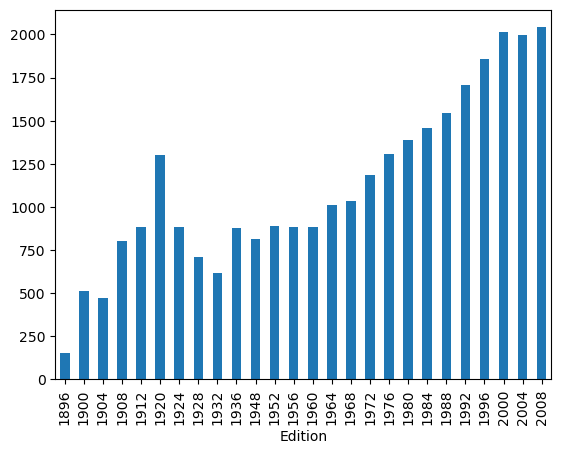

In [109]:
medal_each_year = olympics[['Edition','Medal']].groupby("Edition").count()
medal_each_year
# get plot
medal_each_year.plot(kind='bar', legend=False)

Create a list showing the total number of medals won for each country over the history of the Olympics. For each country, include the year of the first and most recent Olympic medal wins. (3 points)

In [111]:
medal_each_country = olympics_country_name[['Country','Edition','Medal']].groupby("Country").agg({
    'Medal':'count',
    'Edition':['max','min']
})
print(medal_each_country)

               Medal Edition      
               count     max   min
Country                           
Algeria           14    2008  1984
Argentina        239    2008  1924
Armenia            9    2008  1996
Australia       1075    2008  1896
Austria          146    2008  1896
...              ...     ...   ...
Venezuela         11    2008  1952
Vietnam            2    2008  2000
Virgin Islands     1    1988  1988
Zambia             2    1996  1984
Zimbabwe          23    2008  1980

[111 rows x 3 columns]


Plot the number of medals achieved by the Chinese team (men and women) in Beijing 2008 using:
- matplotlib
- Seaborn      (3 points)

          City Edition          Sport       Discipline  NOC Gender  \
27176  Beijing    2008       Aquatics           Diving  CHN    Men   
27177  Beijing    2008       Aquatics           Diving  CHN  Women   
27178  Beijing    2008       Aquatics           Diving  CHN  Women   
27180  Beijing    2008       Aquatics           Diving  CHN    Men   
27181  Beijing    2008       Aquatics           Diving  CHN    Men   
...        ...     ...            ...              ...  ...    ...   
29138  Beijing    2008  Weightlifting    Weightlifting  CHN    Men   
29140  Beijing    2008  Weightlifting    Weightlifting  CHN    Men   
29156  Beijing    2008      Wrestling  Wrestling Free.  CHN  Women   
29171  Beijing    2008      Wrestling  Wrestling Free.  CHN  Women   
29204  Beijing    2008      Wrestling  Wrestling Gre-R  CHN    Men   

                Event           Athlete Event_gender   Medal Country  
27176    10m platform       ZHOU, Luxin            M  Silver   China  
27177    10m plat

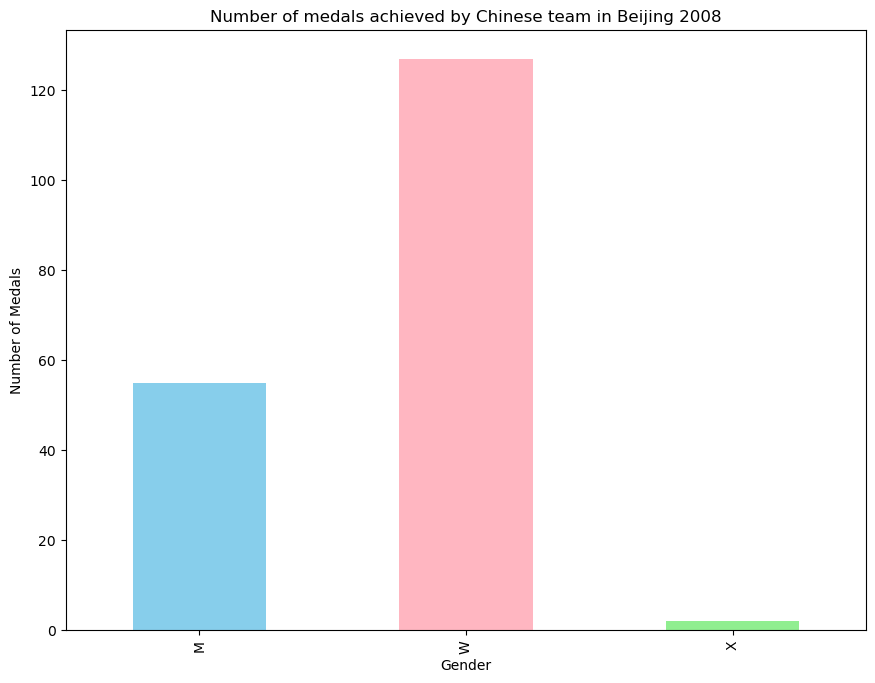

In [118]:
china_filter = (olympics_country_name['Country'] == "China") & (olympics_country_name['Edition'] == "2008")

china_2008 = olympics_country_name.loc[china_filter]
print(china_2008)

# group by gender
china_2008_by_gender = china_2008.groupby('Event_gender')['Medal'].count()
print(china_2008_by_gender)

# using seaborn
fig = plt.figure(figsize=(8,6))
axe = fig.add_axes([.1,.1,1,1])
color=['skyblue', 'lightpink', 'lightgreen']
china_2008_by_gender.plot(kind='bar',color=color)
axe.set_title('Number of medals achieved by Chinese team in Beijing 2008')
axe.set_xlabel('Gender')
axe.set_ylabel('Number of Medals')
plt.show()



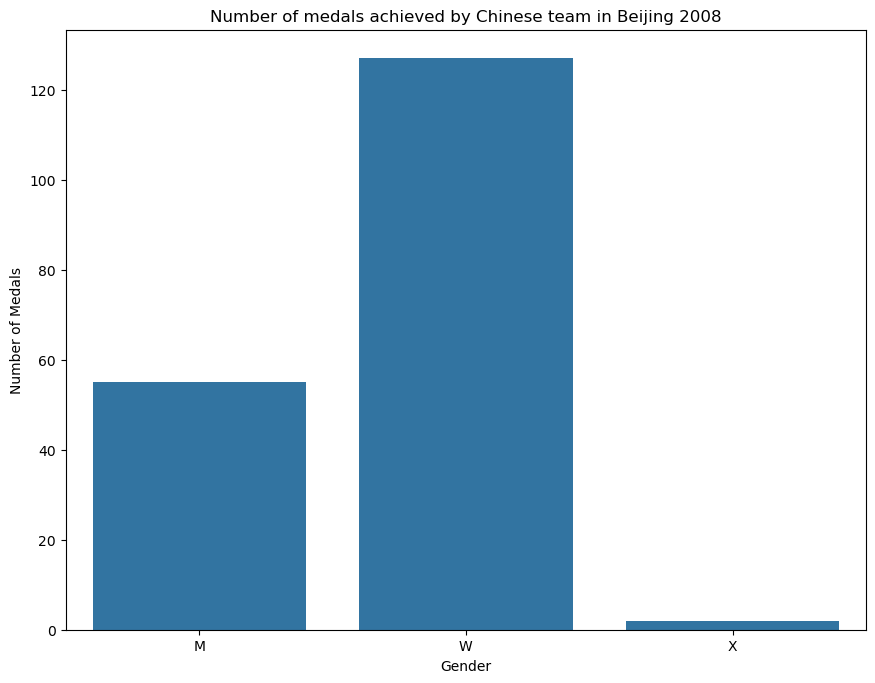

In [121]:
# using seaboen
import seaborn as sns
fig = plt.figure(figsize=(8,6))
axe = fig.add_axes([.1,.1,1,1])
sns.barplot(x=china_2008_by_gender.index,y=china_2008_by_gender.values)
axe.set_title('Number of medals achieved by Chinese team in Beijing 2008')
axe.set_xlabel('Gender')
axe.set_ylabel('Number of Medals')
plt.show()
